In [86]:
import warnings
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt

# this is just a quick test to see how 2D fitting handles sparsely sampled data
# let's create a hypothetical illumination pattern:

y, x = np.mgrid[:1024, :1024]
z = 2. * x ** 2 - 0.5 * x ** 2 + 1.5 * x * y - 1.

%matplotlib inline

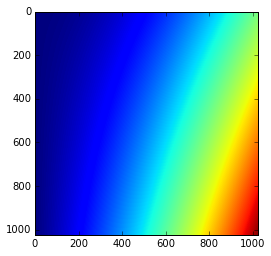

In [87]:
plt.imshow(z)

300 500


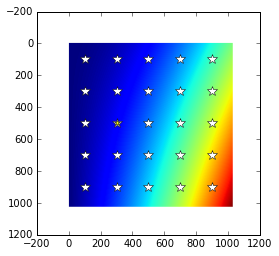

In [88]:
# now let's sample it on a grid of 30 x, y positions across the "detector":
ysamp, xsamp = np.mgrid[100:1000:200, 100:1000:200]

# but make these arrays into 1D arrays (like a list), like what we'd expect from SEP:
ysamp = ysamp.reshape(25)
xsamp = xsamp.reshape(25)

plt.imshow(z)
plt.plot(xsamp, ysamp, '*', ms=10, mfc='white')

plt.plot(xsamp[1], ysamp[11], '*', mfc='yellow') # one of these is yellow to show the difference in x, y array indexing

print xsamp[1], ysamp[11]

In [89]:
# Now the corresponding values for our "illumination", i.e. the z fluxes, are given by:
zsamp = z[xsamp, ysamp]

# And we now have three lists, like what we might anticipate getting from SEP:
print xsamp

print ysamp

print zsamp

[100 300 500 700 900 100 300 500 700 900 100 300 500 700 900 100 300 500
 700 900 100 300 500 700 900]
[100 100 100 100 100 300 300 300 300 300 500 500 500 500 500 700 700 700
 700 700 900 900 900 900 900]
[   29999.    59999.    89999.   119999.   149999.   179999.   269999.
   359999.   449999.   539999.   449999.   599999.   749999.   899999.
  1049999.   839999.  1049999.  1259999.  1469999.  1679999.  1349999.
  1619999.  1889999.  2159999.  2429999.]


In [90]:
# Fit the data using astropy.modeling
p_init = models.Polynomial2D(degree=2)
fit_p = fitting.LevMarLSQFitter()

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p = fit_p(p_init, xsamp, ysamp, zsamp) # Fit to these SEP-like lists for x, y, z

300 500
359999.0 359999.0


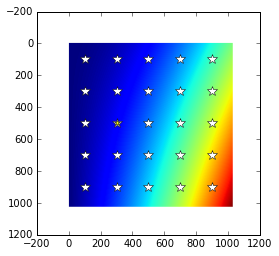

In [97]:
# Now we can test resulting fit on a generic 1024 x 1024 array:
x_test, y_test = np.mgrid[:1024, :1024]

# note that there is some swapping of indices here (in comparison to where we first set up the x and y variables)
# not sure why, but it checks out... something to do with Python's y-indexing preferences.
fitted_model = p(x_test, y_test) 
# be VERY careful with this!

# we can test it like below (p result vs. actual z value)
plt.imshow(fitted_model)
plt.plot(xsamp, ysamp, '*', ms=10, mfc='white')

plt.plot(xsamp[1], ysamp[11], '*', mfc='yellow') # one of these is yellow to show the difference in x, y array indexing

print xsamp[1], ysamp[11]

ztest = 2. * (300.0) ** 2 - 0.5 * (300.0) ** 2 + 1.5 * (300.) * (500.) - 1.
print p(500,300), ztest

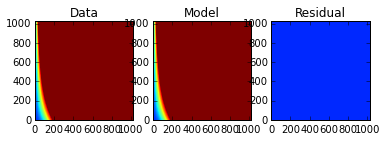

In [99]:
# note the figure convention here
plt.figure(figsize=(8, 2.5))
plt.subplot(1, 3, 1)
plt.imshow(z, origin='lower', interpolation='nearest', vmin=-1e4, vmax=5e4)
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x_test, y_test), origin='lower', interpolation='nearest', vmin=-1e4,
           vmax=5e4)
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(z - p(x_test, y_test), origin='lower', interpolation='nearest', vmin=-1e4,
           vmax=5e4)
plt.title("Residual")